## Inverse Kinematics: Backward Shift

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Arm:
    def __init__(self, _ax, _ay, _length, _angle):
        self.ax = _ax
        self.ay = _ay
        self.length = _length
        self.angle = _angle
        self.bx = self.ax + self.length * np.cos(self.angle)
        self.by = self.ay + self.length * np.sin(self.angle)

    def backward(self, tx, ty):
        theta = np.arctan2(ty - self.ay, tx - self.ax)
        self.ax = tx - self.length * np.cos(theta)
        self.ay = ty - self.length * np.sin(theta)
        self.bx = tx
        self.by = ty
    
    def shift(self, dx, dy):
        self.ax += dx
        self.ay += dy
        self.bx += dx
        self.by += dy

<IPython.core.display.Javascript object>


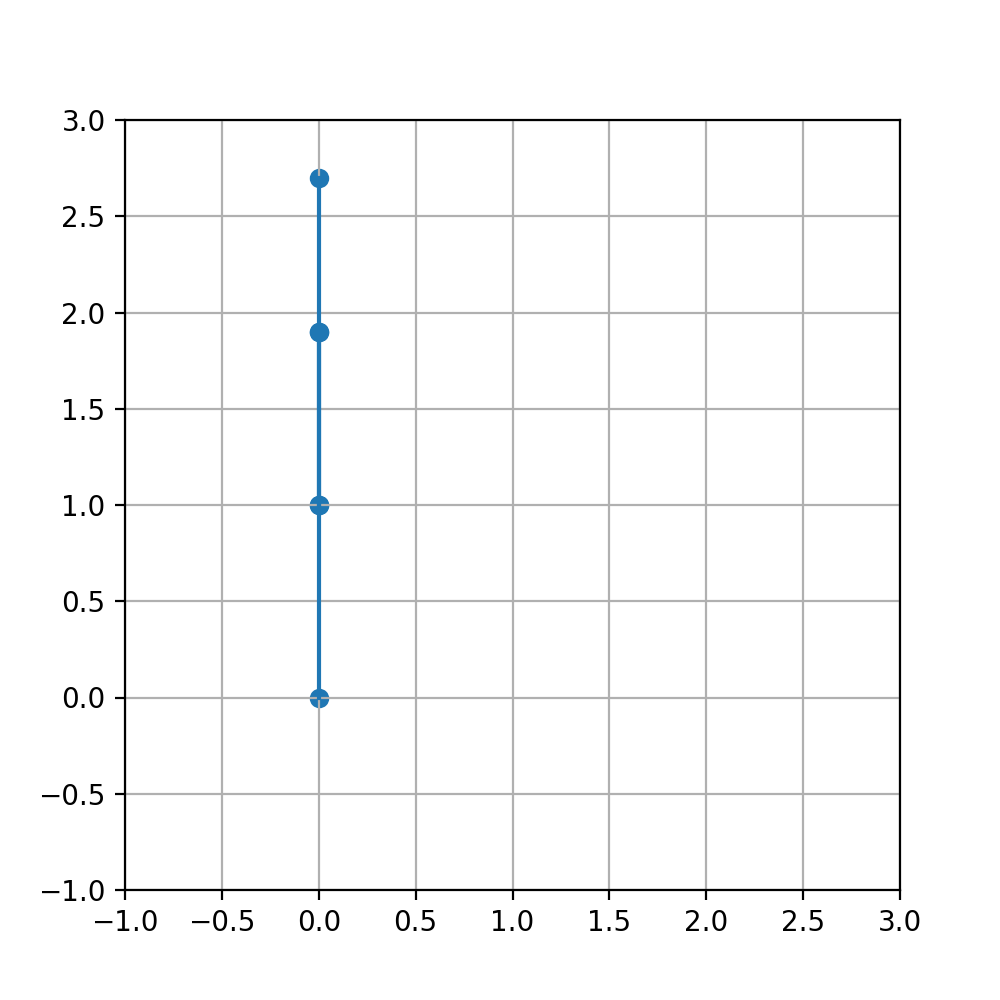

In [4]:
# Forward Kinematics

N  = 3 # the number of link
OX = 0 # offset x: Base coordinates
OY = 0 # offset y: Base coordinates

bws = []
for i in range(N):
    linkLength = 1 - i * 0.1
    initTheta = np.pi / 2   # initial angle
    if i == 0:
        bws.append(Arm(OX, OY, linkLength, initTheta))
    else:
        bws.append(Arm(bws[i-1].bx, bws[i-1].by, linkLength, initTheta))
        
bwsX = []
bwsY = []
for i in range(N):
    bwsX.append([bws[i].ax, bws[i].bx])
    bwsY.append([bws[i].ay, bws[i].by])
        
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis([-1,N,-1,N])
ax.grid()
ax.plot(bwsX, bwsY, color='tab:blue')
ax.scatter(bwsX, bwsY)

In [5]:
# Backward + Zero shift

def Backward_Shift(arm, _tx, _ty):
    tx = _tx
    ty = _ty
    for i in reversed(range(N)):
        arm[i].backward(tx, ty)
        tx = arm[i].ax
        ty = arm[i].ay
    
    dx = OX - arm[0].ax
    dy = OX - arm[0].ay 
    PX = []
    PY = []
    for i in range(N):
        arm[i].shift(dx, dy)
        PX.append(arm[i].ax)
        PY.append(arm[i].ay) 
    PX.append(arm[N-1].bx)
    PY.append(arm[N-1].by)
    
    return PX, PY

In [10]:
# Inverse Kinematics: End-effector follows Mouse coodinates

def motion(event):
    mx = event.xdata
    my = event.ydata
    Mouse.set_data(mx, my)
    
    BX, BY = Backward_Shift(bws, mx, my)
    BLine.set_data(BX, BY)
    BDot.set_data(BX, BY)
    
    plt.draw()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis([-1,N,-1,N])
ax.grid()

BLine, = ax.plot([],[], linestyle='-', color='blue', alpha=1, label='BackWard Shift')
BDot, = ax.plot([],[], marker='o', color='tab:blue')
Mouse, = ax.plot([],[], marker='x', ms=20, color='red')

plt.connect('motion_notify_event', motion)
plt.legend(loc='lower right')
plt.show()

<IPython.core.display.Javascript object>